In [ ]:
!pip install numpy pandas scikit-learn matplotlib


#import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#clean and preprocess text

In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


#convert text into numbers for tokenization

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['message'] = df['message'].apply(clean_text)
df['label'] = df['label'].map({'ham':0, 'spam':1})


#model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#Train the models

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

#Evaluate Performance

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9560538116591928

Confusion Matrix:
 [[963   2]
 [ 47 103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       965
           1       0.98      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



#Test on new mail

In [ ]:
def predict_spam(text):
    text = clean_text(text)
    text_tfidf = vectorizer.transform([text])
    pred = model.predict(text_tfidf)[0]
    return "Spam 🚫" if pred==1 else "Not Spam ✅"

print(predict_spam("Congratulations! You won $1000. Click the link now."))
print(predict_spam("Hey, can we meet tomorrow to finish the project?"))


Not Spam ✅
Not Spam ✅


#Visualize Accuracy

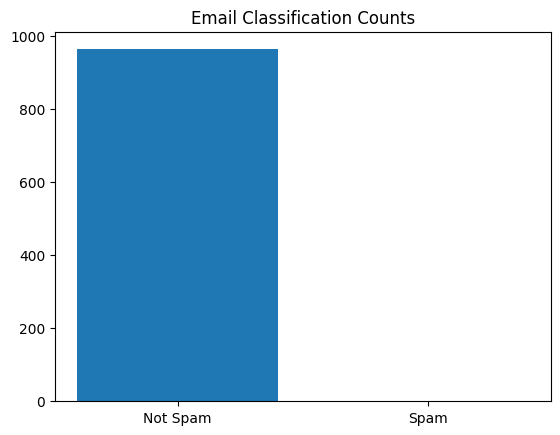

In [ ]:
plt.bar(['Not Spam', 'Spam'], confusion_matrix(y_test, y_pred)[0])
plt.title('Email Classification Counts')
plt.show()
